In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Deconstructing Chains ##

Let $S$ be a finite or countably infinite set of states. Any stochastic matrix with rows and columns indexed by $S$ is the transition matrix of some Markov chain with state space $S$. The transition behaviors of Markov chains are thus as varied as the matrices. It is helpful to set up terminology to discuss some of these behaviors.

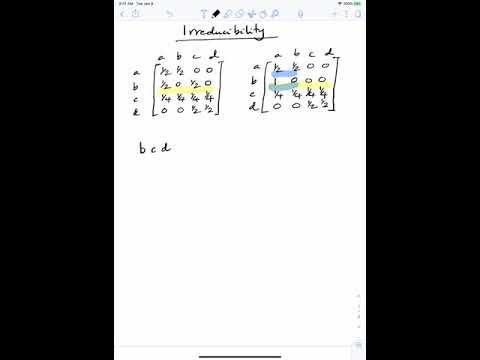

In [2]:
# VIDEO: Irreducibility
from IPython.display import YouTubeVideo

YouTubeVideo('Cnosegp3IlI')

### Irreducibility ###

If it is possible for the chain to get from state $i$ to state $j$, we say that *$i$ leads to $j$* and we write $i \rightarrow j$. Usually you can decide whether $i$ leads to $j$ just by examining the transition diagram of the chain. As a formal definition, $i \rightarrow j$ if:
- There is a path of positive probability that starts at $i$ and ends at $j$.
- Equivalently, there is some $n > 0$ such that $P_n(i, j) > 0$.

We say that *$i$ communicates with $j$* if $i \rightarrow j$ and $j \rightarrow i$. In that case we write $i \leftrightarrow j$.

If all the states of a chain communicate with each other, the chain is called *irreducible*.

The sticky reflecting random walk of the previous section is irreducible, because it is possible for the chain to get from every state to every other state.

**A way to establish irreducibility**

Suppose a chain has a finite number of states. A good way to establish the irreducibility of the chain is to construct a path that

- starts at any state,
- goes through all of the other states,
- ends at the starting state,
- and has positive probability.

Then for any two states $i$ and $j$, there is a segment of the path that starts at $i$ and ends at $j$, and another segment that starts at $j$ and ends at $i$, and both segments have positive probability. So it is possible to get from any state to any other state.

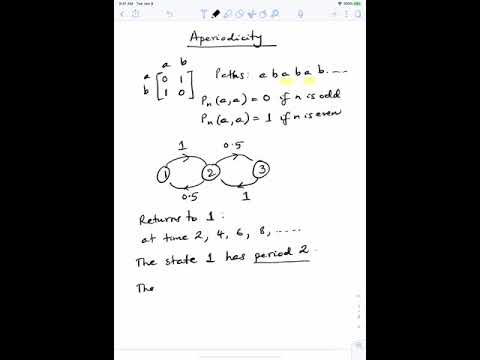

In [3]:
# VIDEO: Aperiodicity

YouTubeVideo('dtsukvJUscs')

### Aperiodicity ###
Working in discrete time has disadvantages. One of them is that states can be *periodic*. Let's start with the example of a random walk where the steps are based on tosses of a fair coin. Suppose the walk starts at state 0. Then it can return to 0 only at even times: the number of heads up to that point has to exactly equal the number of tails, and thus the number of tosses has to be even. We say that the state 0 *has period 2.* 

A state $i$ has *period* $d$ if, starting at $i$, the chain can come back to $i$ only at times that are multiples of $d$. That is, $d$ is the greatest common divisor of the set all $n$ such that $P_n(i, i) > 0$.

In the random walk described above, all states have period 2. 

Period causes trouble with statements about long-run behavior. For example, if state $i$ has period 3, then the sequence $P_n(i, i)$ might look like "0, 0, positive, 0, 0, positive, $\ldots$", so limit statements might become complicated. 

In this course we will study the long run behavior of chains in which all states are *aperiodic*, that is, they have period 1. In other words there is no cyclical pattern to when the chain can return to any state. 

How do you check if all states are aperiodic? If the chain is irreducible, it turns out that all the states must have the same period. The proof of this fact isn't terribly hard but we won't go through it. What it implies is that if a chain is irreducible, which is easy to check, all you have to do is figure out the period of one of its states. Then all the others must have the same period.

**A way to establish aperiodicity**

Some states are easy to identify as aperiodic. If the one-step transition probability $P(i, i)$ is positive, then the state $i$ has to be aperiodic. Since the chain can stay at $i$ for arbitrary lengths of time, it cannot have a cyclical pattern in how it returns to a state.

So if you have an irreducible chain, it's a good idea to look on the diagonal of the transition matrix. If you see a non-zero element on the diagonal, the chain is aperiodic.

That's not a necessary condition for the chain to be aperiodic, but it's sufficient and very easy to spot.

### Example: Deconstructing a Chain ###
Consider the chain with transition matrix given by


|       | **a** | **b** | **c** | **d** | **e** |
|-------|-------|-------|-------|-------|-------|
| **a** |   0   | 1     |   0   |   0   |   0   |
| **b** |   1   | 0     |   0   |   0   |   0   |
| **c** |   0   | 1/3   |  1/3  |  1/3  |  0    |
| **d** |   0   | 0     |   0   |  1/3  |  2/3  |
| **e** |   0   | 0     |   0   |  4/5  |  1/5  |

- States $a$ and $b$ communicate with each other and with no other state, and thus are called a *communicating class*. The little matrix

|       | **a** | **b** |
|-------|-------|-------|
| **a** |   0   | 1     |
| **b** |   1   | 0     |

is a transition matrix in its own right, albeit of a rather boring chain that goes deterministically back and forth between $a$ and $b$. Both $a$ and $b$ have period 2.

- States $d$ and $e$ form their own communicating class and are aperiodic.

|       | **d** | **e** |
|-------|-------|-------|
| **d** |  1/3  |  2/3  |
| **e** |  4/5  |  1/5  |

- State $c$ communicates with itself, but once it gets to either $b$ or $d$, it can't return.

In this course we will work only with **irreducible, aperiodic Markov chains on finite state spaces**. Much of what we say will be true for periodic chains as well, and for chains with countably infinite state spaces.